# Modelling Distilroberta finetuned on financial news data for sentiment analysis
Models used: 
* https://huggingface.co/mr8488/distilroberta-finetuned-financial-news-sentiment-analysis-v2
* https://huggingface.co/mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis
* https://huggingface.co/RashidNLP/Finance-Sentiment-Classification

In [1]:
import pandas as pd
import numpy as np

# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax
import torch

tokenizer = AutoTokenizer.from_pretrained("mr8488/distilroberta-finetuned-financial-news-sentiment-analysis-v2")
model = AutoModelForSequenceClassification.from_pretrained("mr8488/distilroberta-finetuned-financial-news-sentiment-analysis-v2")


In [2]:
# let's read the data
data = pd.read_csv('updated_final_annotated_dataset_with_impacts.csv')

# remove unwanted columns
data = data.drop(columns=['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'])

text_column = 'content'

In [3]:
# let's split the data into default_present only 
default_present = data[data['default_present'] == 1]

# let's split the data into merger_acquisition_present only
merger_acquisition = data[data['mergers_acquisitions_present'] == 1]

# let's split the data into margin only
restructuring = data[data['margin_profitability_present'] == 1]

# let's split the data into industry_competition_present only
industry_competition = data[data['industry_competition_present'] == 1]

# let's split the data into revenue_present only
revenue = data[data['revenue_present'] == 1]

# put the new dfs into a list
dfs = [default_present, merger_acquisition, restructuring, industry_competition, revenue]


In [4]:
def get_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    outputs = model(**inputs)
    probs = softmax(outputs.logits, dim=1)
    sentiment = torch.argmax(probs, dim=1).numpy()[0]  # Assuming 0: negative, 1: neutral, 2: positive
    return ['negative', 'neutral', 'positive'][sentiment], probs[0][sentiment].item()

# Apply sentiment analysis on each slice of the dataset created and create a separate column for the probabilities
for i, df in enumerate(dfs):
    df['sentiment'], df['sentiment_probability'] = zip(*df[text_column].apply(get_sentiment))

/var/folders/qf/22j8yppd4sz6wswjhzwj92vw0000gn/T/ipykernel_92879/3740779092.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'], df['sentiment_probability'] = zip(*df[text_column].apply(get_sentiment))
/var/folders/qf/22j8yppd4sz6wswjhzwj92vw0000gn/T/ipykernel_92879/3740779092.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'], df['sentiment_probability'] = zip(*df[text_column].apply(get_sentiment))
/var/folders/qf/22j8yppd4sz6wswjhzwj92vw0000gn/T/ipykernel_92879/374077909

In [5]:
data['sentiment'], data['sentiment_probability'] = zip(*data[text_column].apply(get_sentiment))

In [6]:
# let's export the dfs to excel with a tab for each df in dfs
with pd.ExcelWriter('sentiment_analysis_v2.xlsx') as writer:
    for i, d in enumerate(dfs):
        d.to_excel(writer, sheet_name=f'df_{i}', index=False)

In [6]:
data.to_csv('sentiment_analysis_v2.csv', index=False)

In [2]:
# import the data back
data = pd.read_csv('sentiment_analysis_v2.csv')

In [3]:
# the slices 
# let's split the data into default_present only 
default_present = data[data['default_present'] == 1]

# let's split the data into merger_acquisition_present only
merger_acquisition = data[data['mergers_acquisitions_present'] == 1]

# let's split the data into margin only
restructuring = data[data['margin_profitability_present'] == 1]

# let's split the data into industry_competition_present only
industry_competition = data[data['industry_competition_present'] == 1]

# let's split the data into revenue_present only
revenue = data[data['revenue_present'] == 1]

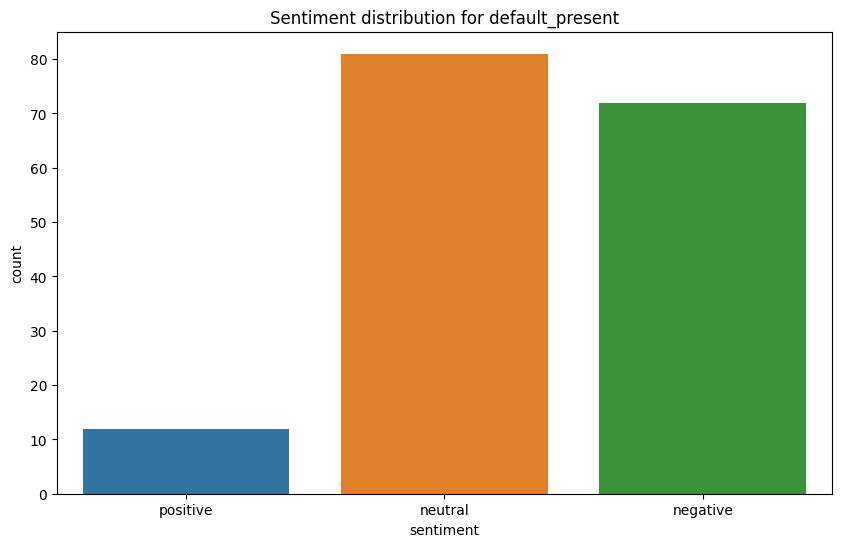

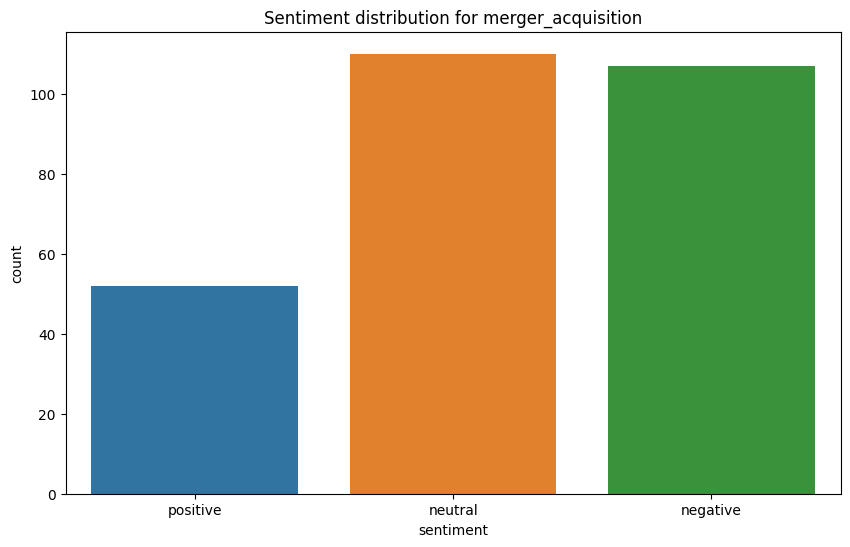

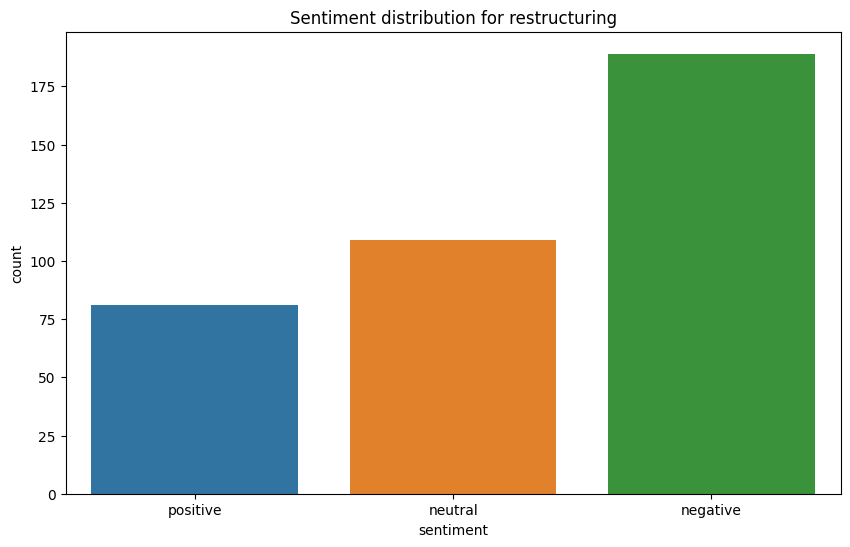

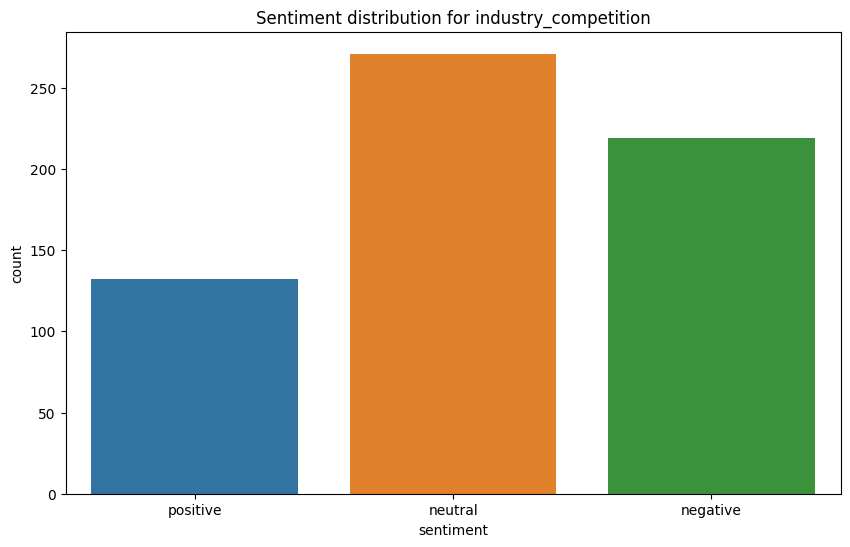

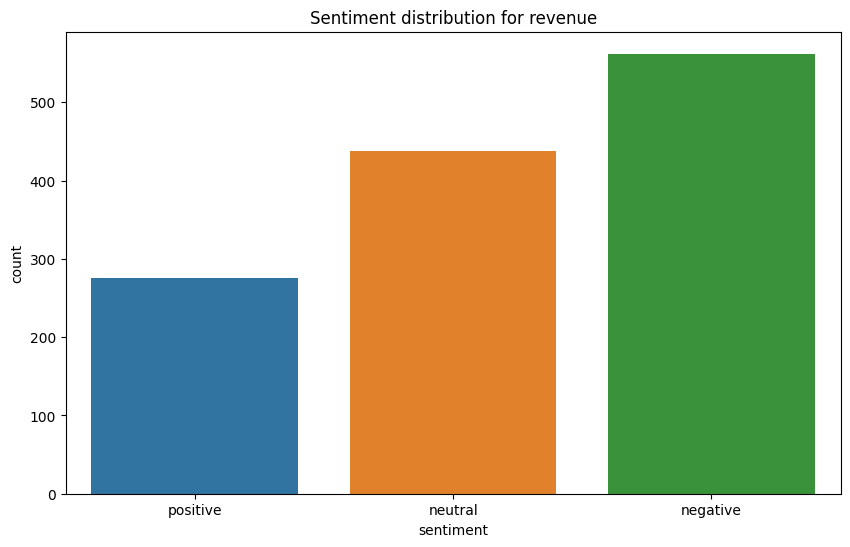

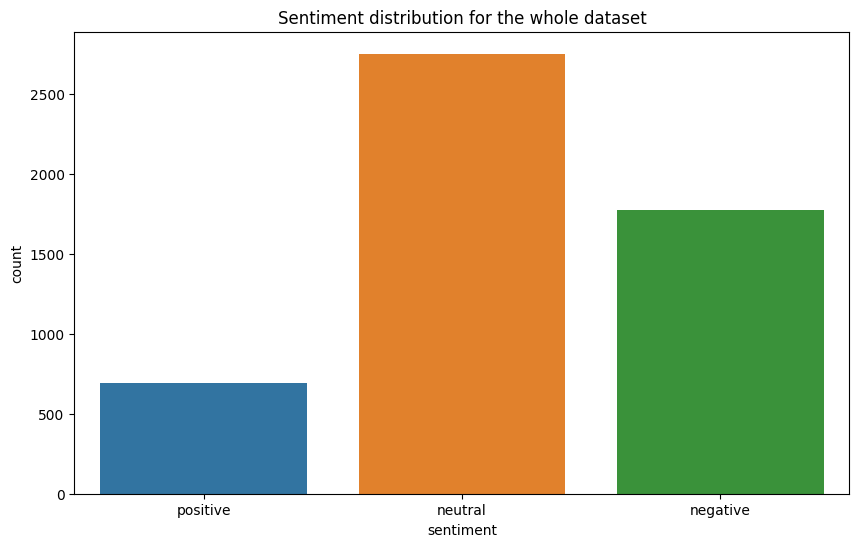

Text(0.5, 1.0, 'Sentiment distribution for revenue')

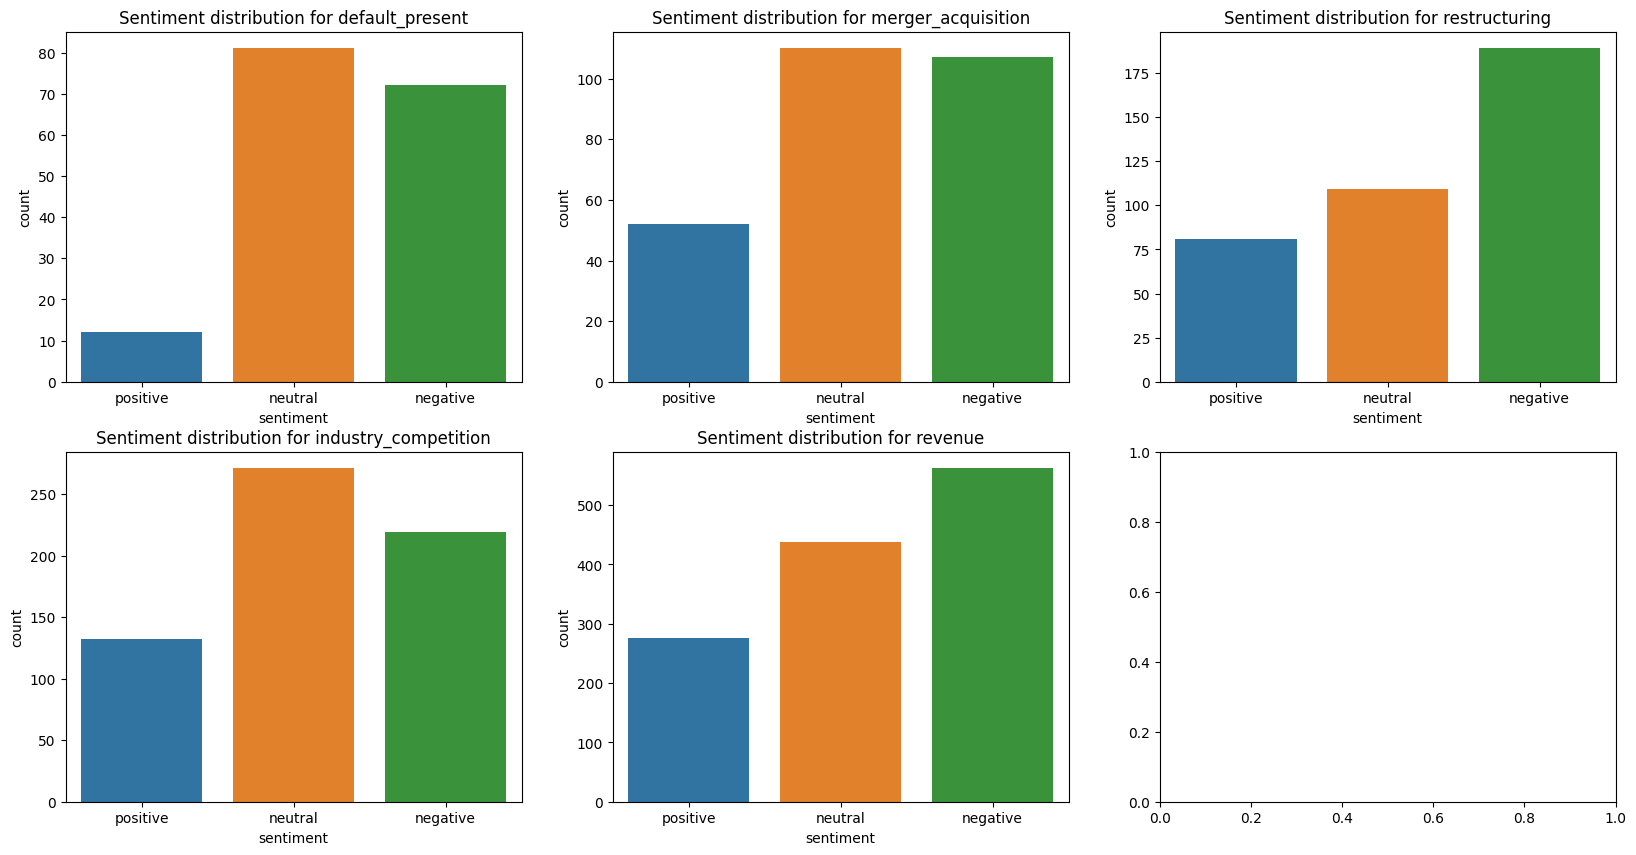

In [5]:
# do some bar plots on the sentiment and sentiment_probability columns based on the different slices
import matplotlib.pyplot as plt
import seaborn as sns

# let's plot the sentiment distribution for the default_present slice, make sure each plot starts with positive and ends with negative
plt.figure(figsize=(10, 6))
sns.countplot(data=default_present, x='sentiment', order=['positive', 'neutral', 'negative'])
plt.title('Sentiment distribution for default_present')
plt.show()

# let's plot the sentiment distribution for the merger_acquisition slice
plt.figure(figsize=(10, 6))
sns.countplot(data=merger_acquisition, x='sentiment', order=['positive', 'neutral', 'negative'])
plt.title('Sentiment distribution for merger_acquisition')
plt.show()

# let's plot the sentiment distribution for the restructuring slice
plt.figure(figsize=(10, 6))
sns.countplot(data=restructuring, x='sentiment', order=['positive', 'neutral', 'negative'])
plt.title('Sentiment distribution for restructuring')
plt.show()

# let's plot the sentiment distribution for the industry_competition slice
plt.figure(figsize=(10, 6))
sns.countplot(data=industry_competition, x='sentiment', order=['positive', 'neutral', 'negative'])
plt.title('Sentiment distribution for industry_competition')
plt.show()

# let's plot the sentiment distribution for the revenue slice
plt.figure(figsize=(10, 6))
sns.countplot(data=revenue, x='sentiment', order=['positive', 'neutral', 'negative'])
plt.title('Sentiment distribution for revenue')
plt.show()

# let's do it for the whole dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='sentiment', order=['positive', 'neutral', 'negative'])
plt.title('Sentiment distribution for the whole dataset')
plt.show()

# combine the plots into one
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

sns.countplot(data=default_present, x='sentiment', order=['positive', 'neutral', 'negative'], ax=axes[0, 0])
axes[0, 0].set_title('Sentiment distribution for default_present')

sns.countplot(data=merger_acquisition, x='sentiment', order=['positive', 'neutral', 'negative'], ax=axes[0, 1])
axes[0, 1].set_title('Sentiment distribution for merger_acquisition')

sns.countplot(data=restructuring, x='sentiment', order=['positive', 'neutral', 'negative'], ax=axes[0, 2])
axes[0, 2].set_title('Sentiment distribution for restructuring')

sns.countplot(data=industry_competition, x='sentiment', order=['positive', 'neutral', 'negative'], ax=axes[1, 0])
axes[1, 0].set_title('Sentiment distribution for industry_competition')

sns.countplot(data=revenue, x='sentiment', order=['positive', 'neutral', 'negative'], ax=axes[1, 1])
axes[1, 1].set_title('Sentiment distribution for revenue')

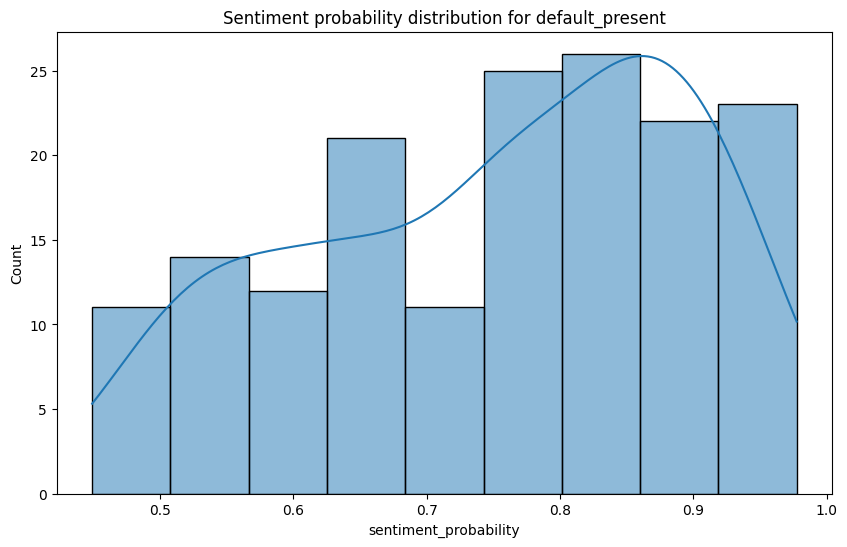

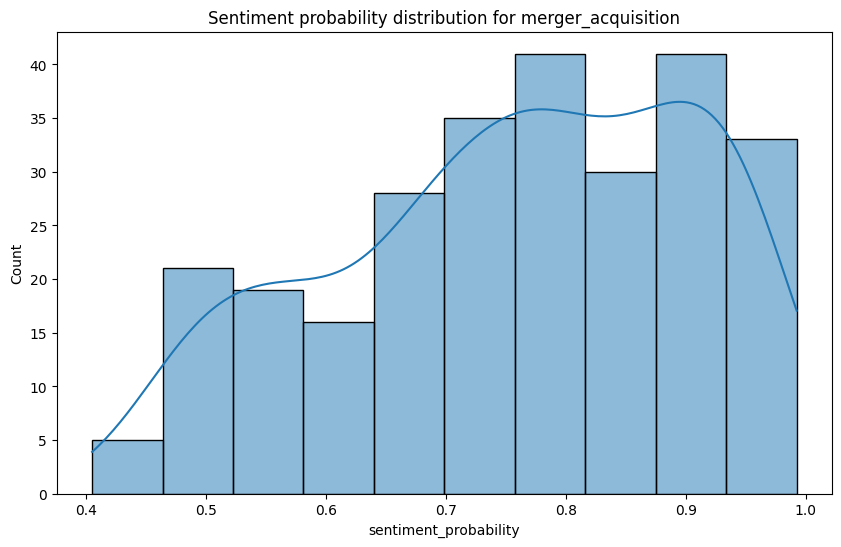

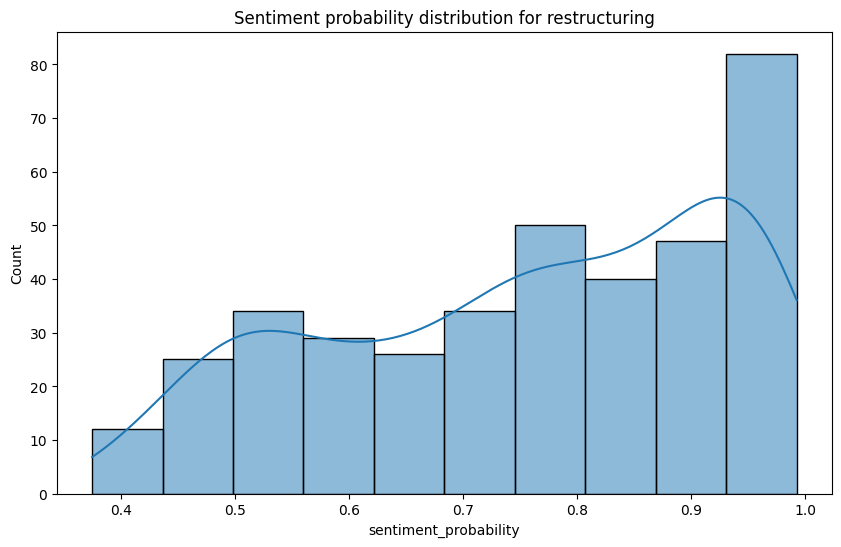

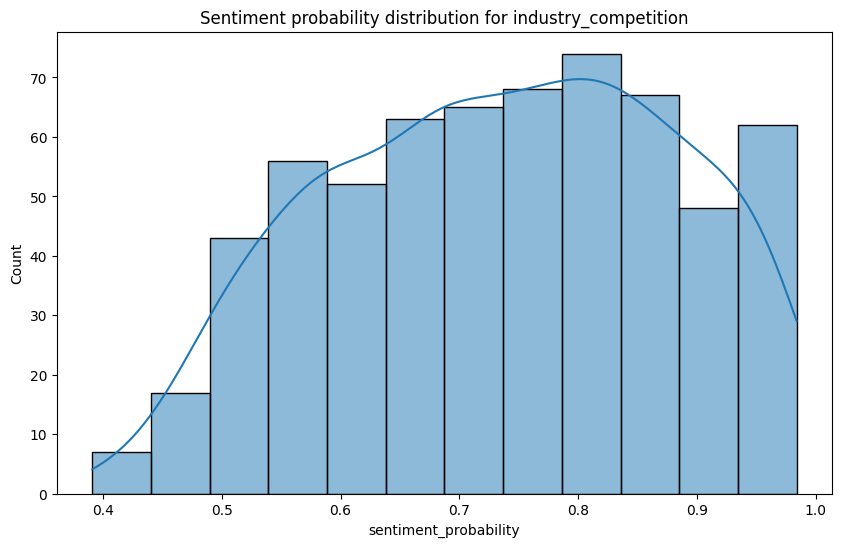

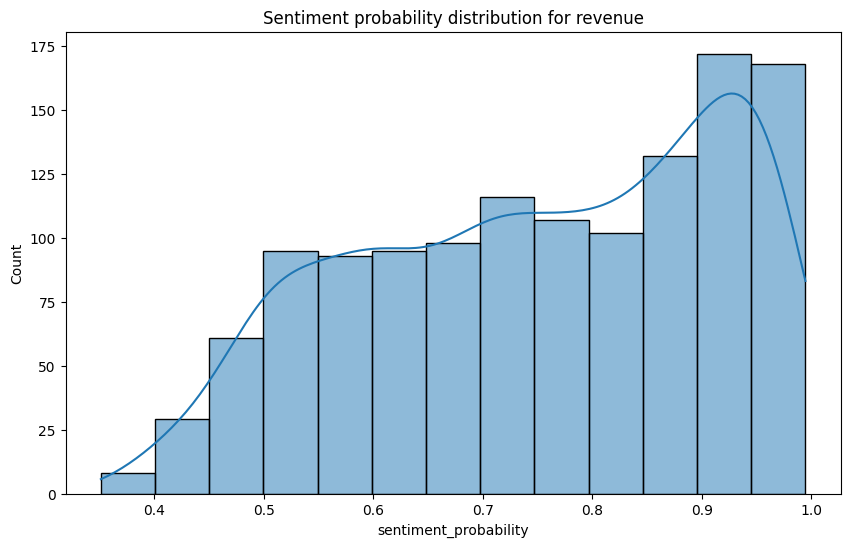

In [13]:
# do the same for the sentiment_probability column
# let's plot the sentiment_probability distribution for default_present
plt.figure(figsize=(10, 6))
sns.histplot(data=default_present, x='sentiment_probability', kde=True)
plt.title('Sentiment probability distribution for default_present')
plt.show()

# let's plot the sentiment_probability distribution for merger_acquisition
plt.figure(figsize=(10, 6))
sns.histplot(data=merger_acquisition, x='sentiment_probability', kde=True)
plt.title('Sentiment probability distribution for merger_acquisition')
plt.show()

# let's plot the sentiment_probability distribution for restructuring
plt.figure(figsize=(10, 6))
sns.histplot(data=restructuring, x='sentiment_probability', kde=True)
plt.title('Sentiment probability distribution for restructuring')
plt.show()

# let's plot the sentiment_probability distribution for industry_competition
plt.figure(figsize=(10, 6))
sns.histplot(data=industry_competition, x='sentiment_probability', kde=True)
plt.title('Sentiment probability distribution for industry_competition')
plt.show()

# let's plot the sentiment_probability distribution for revenue
plt.figure(figsize=(10, 6)) 
sns.histplot(data=revenue, x='sentiment_probability', kde=True)
plt.title('Sentiment probability distribution for revenue')
plt.show()
